#House prices is a continuous qunatity so prdicting that would be a regression problem. 

In [306]:
#Importing all needed Librararies for extracting and representing (visualizing)data.

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [260]:
data = pd.read_csv('/Users/sayedjaberhossaini/Desktop/California Housing Prices/housing.CSV')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [262]:
data.dropna(inplace= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [263]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [264]:
data_shuffled = data.sample(n=len(data), random_state = 1)
data_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6715,-118.18,34.14,38.0,3039.0,487.0,1131.0,465.0,7.7116,360900.0,<1H OCEAN
4121,-118.19,34.14,38.0,1826.0,300.0,793.0,297.0,5.2962,291500.0,<1H OCEAN
15433,-117.25,33.20,10.0,2050.0,473.0,1302.0,471.0,2.7961,131300.0,<1H OCEAN
20272,-119.23,34.19,16.0,5297.0,810.0,1489.0,667.0,6.4522,500001.0,NEAR OCEAN
11843,-120.93,39.96,15.0,1666.0,351.0,816.0,316.0,2.9559,118800.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11065,-117.88,33.79,32.0,1484.0,295.0,928.0,295.0,5.1418,190300.0,<1H OCEAN
17455,-120.43,34.70,26.0,2353.0,389.0,1420.0,389.0,3.8700,125800.0,NEAR OCEAN
5249,-118.45,34.08,52.0,1500.0,176.0,384.0,145.0,7.1576,500001.0,<1H OCEAN
12290,-116.97,33.94,29.0,3197.0,632.0,1722.0,603.0,3.0432,91200.0,INLAND


In [265]:
pd.get_dummies(data_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6715,1,0,0,0,0
4121,1,0,0,0,0
15433,1,0,0,0,0
20272,0,0,0,0,1
11843,0,1,0,0,0


In [266]:
data_shuffled.drop('ocean_proximity', axis = 1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
6715,-118.18,34.14,38.0,3039.0,487.0,1131.0,465.0,7.7116,360900.0
4121,-118.19,34.14,38.0,1826.0,300.0,793.0,297.0,5.2962,291500.0
15433,-117.25,33.20,10.0,2050.0,473.0,1302.0,471.0,2.7961,131300.0
20272,-119.23,34.19,16.0,5297.0,810.0,1489.0,667.0,6.4522,500001.0
11843,-120.93,39.96,15.0,1666.0,351.0,816.0,316.0,2.9559,118800.0


In [272]:
housing_pd_final = pd.concat([data_shuffled.drop('ocean_proximity', axis = 1), pd.get_dummies(data_shuffled['ocean_proximity'])], axis = 1)
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6715,-118.18,34.14,38.0,3039.0,487.0,1131.0,465.0,7.7116,360900.0,1,0,0,0,0
4121,-118.19,34.14,38.0,1826.0,300.0,793.0,297.0,5.2962,291500.0,1,0,0,0,0
15433,-117.25,33.20,10.0,2050.0,473.0,1302.0,471.0,2.7961,131300.0,1,0,0,0,0
20272,-119.23,34.19,16.0,5297.0,810.0,1489.0,667.0,6.4522,500001.0,0,0,0,0,1
11843,-120.93,39.96,15.0,1666.0,351.0,816.0,316.0,2.9559,118800.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11065,-117.88,33.79,32.0,1484.0,295.0,928.0,295.0,5.1418,190300.0,1,0,0,0,0
17455,-120.43,34.70,26.0,2353.0,389.0,1420.0,389.0,3.8700,125800.0,0,0,0,0,1
5249,-118.45,34.08,52.0,1500.0,176.0,384.0,145.0,7.1576,500001.0,1,0,0,0,0
12290,-116.97,33.94,29.0,3197.0,632.0,1722.0,603.0,3.0432,91200.0,0,1,0,0,0


In [273]:
housing_pd_final = housing_pd_final[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'median_house_value']]

In [274]:
train_pd, test_pd, val_pd = housing_pd_final[:18000], housing_pd_final[18000:19217], housing_pd_final[19215:]
len(train_pd), len(test_pd), len(val_pd)



#OR
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

(18000, 1217, 1218)

<AxesSubplot:>

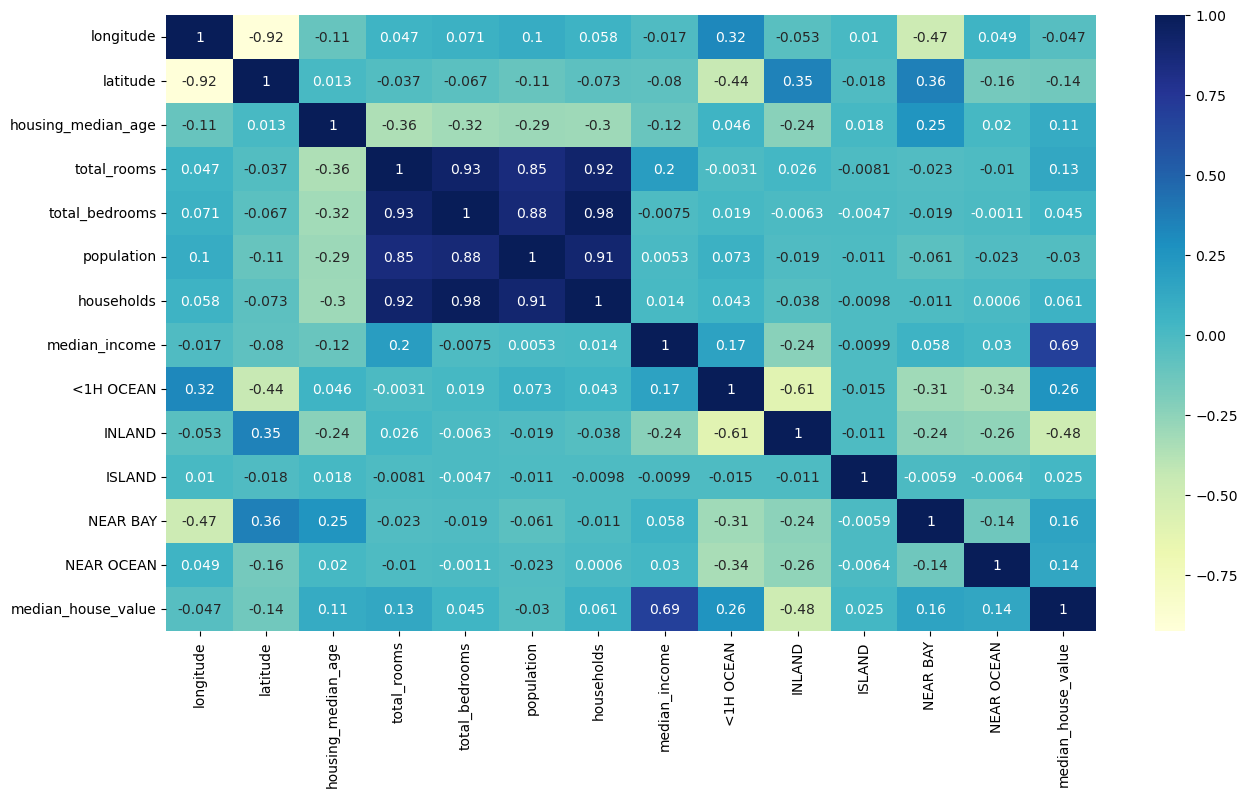

In [275]:
plt.figure(figsize= (15,8))
sns.heatmap(train_pd.corr(),annot = True, cmap = "YlGnBu")

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>],
       [<AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'<1H OCEAN'}>,
        <AxesSubplot:title={'center':'INLAND'}>,
        <AxesSubplot:title={'center':'ISLAND'}>,
        <AxesSubplot:title={'center':'NEAR BAY'}>],
       [<AxesSubplot:title={'center':'NEAR OCEAN'}>,
        <AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

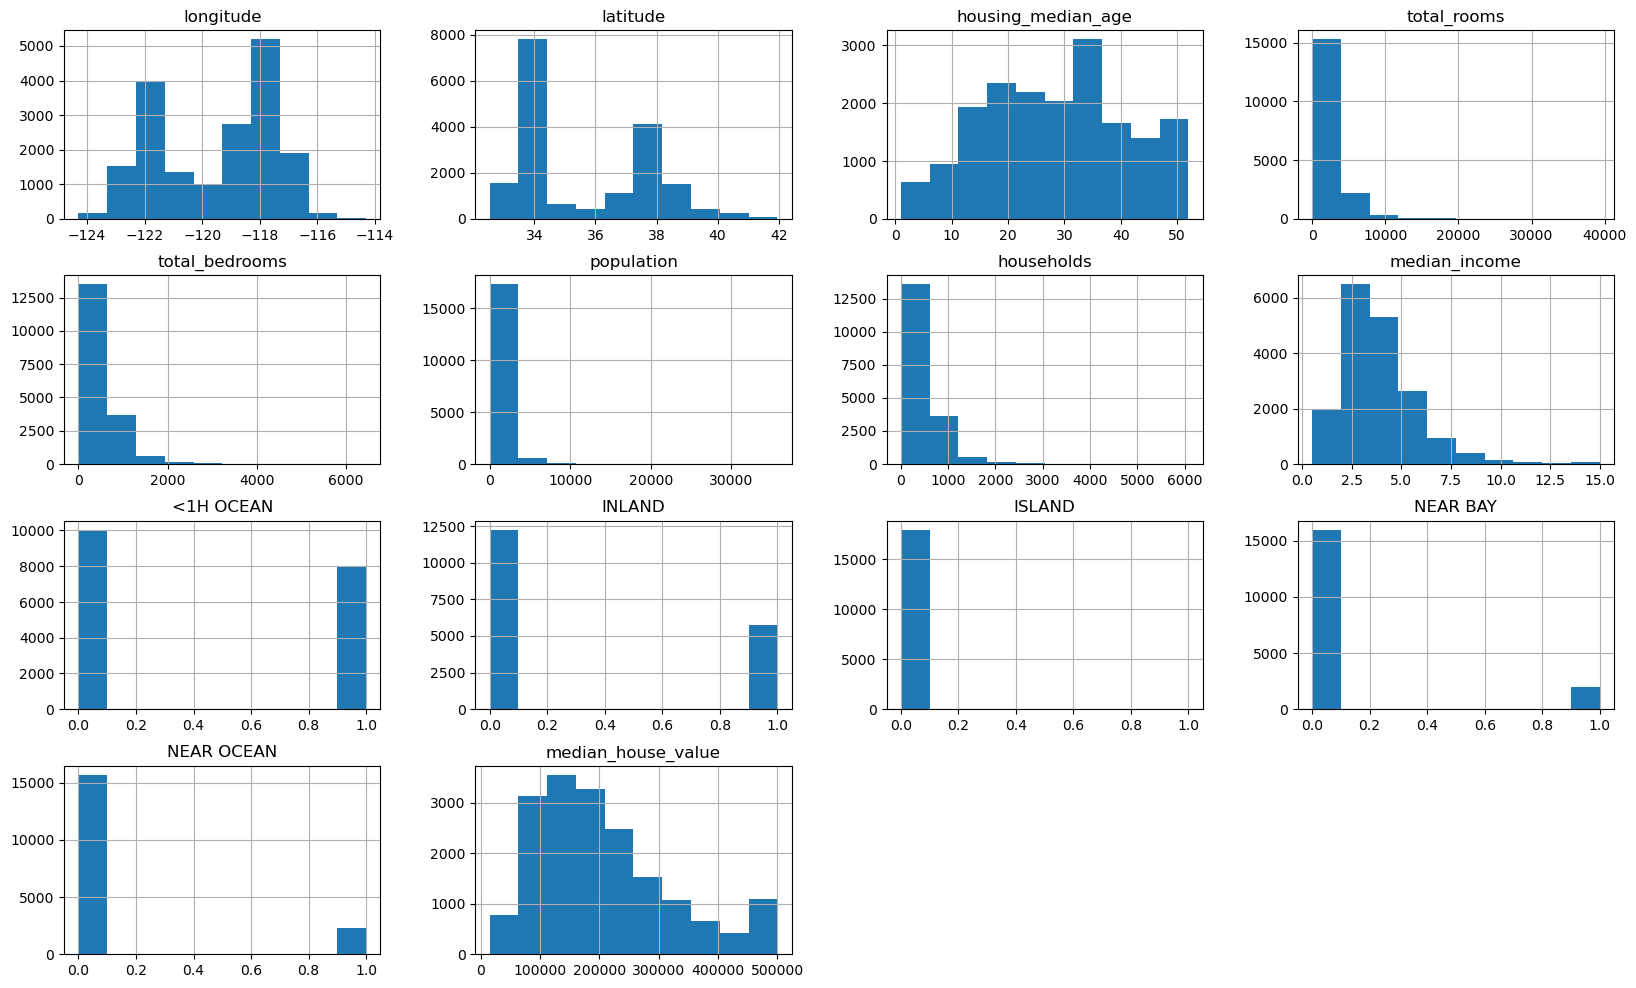

In [276]:
train_pd.hist(figsize=(20,12))

In [277]:
train_pd["total_rooms"] = np.log(train_pd["total_rooms"]+1)
train_pd["total_bedrooms"] = np.log(train_pd["total_bedrooms"]+1)
train_pd["population"] = np.log(train_pd["population"]+1)
train_pd["households"] = np.log(train_pd["households"]+1)
train_pd["median_income"] = np.log(train_pd["median_income"]+1)

val_pd["total_rooms"] = np.log(val_pd["total_rooms"]+1)
val_pd["total_bedrooms"] = np.log(val_pd["total_bedrooms"]+1)
val_pd["population"] = np.log(val_pd["population"]+1)
val_pd["households"] = np.log(val_pd["households"]+1)
val_pd["median_income"] = np.log(val_pd["median_income"]+1)

test_pd["total_rooms"] = np.log(test_pd["total_rooms"]+1)
test_pd["total_bedrooms"] = np.log(test_pd["total_bedrooms"]+1)
test_pd["population"] = np.log(test_pd["population"]+1)
test_pd["households"] = np.log(test_pd["households"]+1)
test_pd["median_income"] = np.log(test_pd["median_income"]+1)

/var/folders/hd/1q8_4qts383bkvt34fypmqgw0000gn/T/ipykernel_19916/3667054925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pd["total_rooms"] = np.log(train_pd["total_rooms"]+1)
/var/folders/hd/1q8_4qts383bkvt34fypmqgw0000gn/T/ipykernel_19916/3667054925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pd["total_bedrooms"] = np.log(train_pd["total_bedrooms"]+1)
/var/folders/hd/1q8_4qts383bkvt34fypmqgw0000gn/T/ipykernel_19916/3667054925.py:3: SettingWithCopyWarning: 
A value is trying to be

In [288]:
x_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
x_val, y_val = val_pd.to_numpy()[:,:-1], val_pd.to_numpy()[:, -1]
x_test, y_test = test_pd.to_numpy()[:,:-1], test_pd.to_numpy()[:, -1]

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

#Or

# x = housing_pd_final.drop(['median_house_value'], axis = 1)
# y = housing_pd_final['median_house_value']

((18000, 13), (18000,), (1218, 13), (1218,), (1217, 13), (1217,))

In [289]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
x_train[:, :8] = scaler.fit_transform(x_train[:, :8])
x_val[:, :8] = scaler.transform(x_val[:, :8])
#x_test[:, :8] = scaler.transform(x_test[:, :8])


In [291]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(x_train, y_train)
mse(lm.predict(x_train), y_train, squared = False), mse(lm.predict(x_val), y_val, squared = False)
#lm.score(x_val,y_val)

(69178.16209862361, 70151.08944927267)

In [294]:
# K-Mean Regressor
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 5).fit(x_train, y_train)
mse(knn.predict(x_train), y_train, squared = False), mse(knn.predict(x_val), y_val, squared = False)


(48138.41110578809, 58419.45923397485)

In [303]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth =8).fit(x_train, y_train)
rfr.fit(x_train, y_train)
mse(rfr.predict(x_train), y_train, squared= False), mse(rfr.predict(x_val), y_val, squared = False)


(52896.75837026404, 58304.98085055994)

In [302]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 550).fit(x_train, y_train)
mse(gbr.predict(x_train), y_train, squared = False), mse(gbr.predict(x_val), y_val, squared = False)

(42266.66225636307, 50548.050104462)